<a href="https://colab.research.google.com/github/saipragna25/saipragna25/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 3.8 MB/s 
     |████████████████████████████████| 3.3 MB 34.5 MB/s 
     |████████████████████████████████| 167 kB 36.5 MB/s 
     |████████████████████████████████| 137 kB 43.1 MB/s 
     |████████████████████████████████| 10.4 MB 3.6 MB/s 
     |████████████████████████████████| 1.3 MB 48.1 MB/s 
     |████████████████████████████████| 6.8 MB 38.8 MB/s 
     |████████████████████████████████| 25.9 MB 65.9 MB/s 
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 2.0 MB 43.9 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 17.0 MB 45 kB/s 
     |████████████████████████████████| 1.7 MB 33.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel m

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.classification import *

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving multiclass.csv to multiclass.csv


In [ ]:
import pandas as pd
dataset=pd.read_csv('multiclass.csv')
dataset.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
#check the shape of data
dataset.shape

(8068, 11)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (7261, 11)
Unseen Data For Predictions: (807, 11)


In [ ]:
exp_mclf101 = setup(data = data, target = 'Segmentation', session_id=123)

,Description,Value
0,session_id,123
1,Target,Segmentation
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2, D: 3"
4,Original Data,"(7261, 11)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Segmentation',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'p

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5427,0.7982,0.5331,0.5372,0.5385,0.3876,0.3883,3.498
lightgbm,Light Gradient Boosting Machine,0.5366,0.7949,0.5267,0.5312,0.5322,0.3794,0.3802,0.452
ada,Ada Boost Classifier,0.5159,0.7562,0.5048,0.5085,0.5098,0.3516,0.3528,0.311
lda,Linear Discriminant Analysis,0.5081,0.7691,0.4993,0.5082,0.5026,0.3425,0.3452,0.065
ridge,Ridge Classifier,0.5063,0.0000,0.4931,0.4860,0.4783,0.3375,0.3453,0.033
rf,Random Forest Classifier,0.5020,0.7714,0.4915,0.4969,0.4976,0.3329,0.3337,0.968
nb,Naive Bayes,0.4907,0.7411,0.4808,0.4838,0.4829,0.3191,0.3213,0.033
et,Extra Trees Classifier,0.4668,0.7390,0.4561,0.4615,0.4632,0.2863,0.2867,1.012
dt,Decision Tree Classifier,0.4612,0.6418,0.4537,0.4636,0.4615,0.2802,0.2806,0.054
knn,K Neighbors Classifier,0.4032,0.6611,0.3977,0.4200,0.4085,0.2043,0.2054,0.153


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4637,0.6437,0.4557,0.4687,0.4657,0.2837,0.2839
1,0.4460,0.6313,0.4365,0.4444,0.4447,0.2590,0.2592
2,0.4587,0.6401,0.4541,0.4696,0.4624,0.2776,0.2785
3,0.4469,0.6320,0.4430,0.4494,0.4477,0.2618,0.2619
4,0.4567,0.6381,0.4441,0.4473,0.4510,0.2721,0.2725
5,0.4547,0.6375,0.4445,0.4538,0.4522,0.2709,0.2718
6,0.5020,0.6695,0.4977,0.5087,0.5042,0.3358,0.3364
7,0.4331,0.6230,0.4264,0.4352,0.4338,0.2430,0.2431
8,0.5039,0.6705,0.4988,0.5101,0.5064,0.3380,0.3383


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4047,0.6649,0.4010,0.4266,0.4121,0.2075,0.2085
1,0.4322,0.6814,0.4257,0.4490,0.4362,0.2422,0.2443
2,0.3622,0.6314,0.3592,0.3841,0.3683,0.1512,0.1524
3,0.4252,0.6653,0.4208,0.4386,0.4293,0.2342,0.2350
4,0.4252,0.6900,0.4176,0.4352,0.4278,0.2321,0.2331
5,0.3957,0.6514,0.3889,0.4195,0.4038,0.1944,0.1957
6,0.3976,0.6647,0.3938,0.4181,0.4035,0.1972,0.1985
7,0.3819,0.6561,0.3772,0.3977,0.3879,0.1763,0.1768
8,0.4173,0.6717,0.4087,0.4248,0.4197,0.2216,0.2221


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2849,0.5051,0.25,0.0812,0.1263,0.0,0.0
1,0.2849,0.4777,0.25,0.0812,0.1263,0.0,0.0
2,0.2854,0.4714,0.25,0.0815,0.1268,0.0,0.0
3,0.2854,0.4829,0.25,0.0815,0.1268,0.0,0.0
4,0.2854,0.5114,0.25,0.0815,0.1268,0.0,0.0
5,0.2854,0.4704,0.25,0.0815,0.1268,0.0,0.0
6,0.2854,0.5099,0.25,0.0815,0.1268,0.0,0.0
7,0.2835,0.5193,0.25,0.0804,0.1252,0.0,0.0
8,0.2835,0.5089,0.25,0.0804,0.1252,0.0,0.0


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5580,0.7913,0.5473,0.5535,0.5442,0.4075,0.4125
1,0.5285,0.7776,0.5171,0.5173,0.5170,0.3668,0.3696
2,0.5276,0.7843,0.5210,0.5310,0.5276,0.3684,0.3694
3,0.5591,0.7898,0.5473,0.5467,0.5496,0.4091,0.4108
4,0.5374,0.7924,0.5240,0.5217,0.5254,0.3794,0.3815
5,0.5059,0.7568,0.4939,0.4941,0.4957,0.3382,0.3404
6,0.5197,0.7653,0.5110,0.5122,0.5136,0.3567,0.3579
7,0.4961,0.7489,0.4824,0.4775,0.4778,0.3236,0.3275
8,0.5217,0.7665,0.5095,0.5100,0.5105,0.3588,0.3612


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4224,0.6661,0.4169,0.4222,0.4212,0.2290,0.2294
1,0.4204,0.6763,0.4133,0.4198,0.4166,0.2238,0.2250
2,0.3839,0.6419,0.3802,0.3891,0.3858,0.1779,0.1781
3,0.4173,0.6577,0.4138,0.4188,0.4154,0.2215,0.2224
4,0.4114,0.6911,0.4035,0.4082,0.4091,0.2124,0.2127
5,0.3917,0.6375,0.3856,0.3955,0.3934,0.1880,0.1881
6,0.4055,0.6631,0.3987,0.4028,0.4037,0.2050,0.2052
7,0.4035,0.6713,0.3970,0.3994,0.4009,0.2026,0.2028
8,0.3858,0.6553,0.3762,0.3791,0.3818,0.1784,0.1787


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3929,0.6721,0.3747,0.3350,0.3465,0.1810,0.1888
1,0.4283,0.6736,0.4100,0.4054,0.3826,0.2277,0.2400
2,0.4134,0.6582,0.3992,0.3896,0.3834,0.2109,0.2171
3,0.2382,0.5361,0.2500,0.0567,0.0916,0.0000,0.0000
4,0.4390,0.6862,0.4188,0.4302,0.3945,0.2409,0.2547
5,0.4134,0.6716,0.3938,0.3698,0.3701,0.2083,0.2165
6,0.3957,0.6483,0.3779,0.3578,0.3543,0.1839,0.1914
7,0.4094,0.6537,0.3925,0.3885,0.3708,0.2031,0.2120
8,0.4252,0.6799,0.4064,0.3848,0.3799,0.2245,0.2350


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


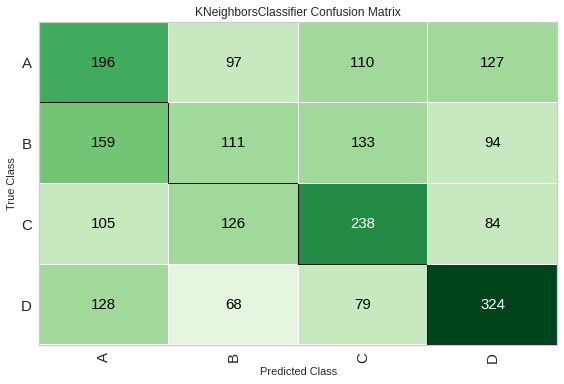

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

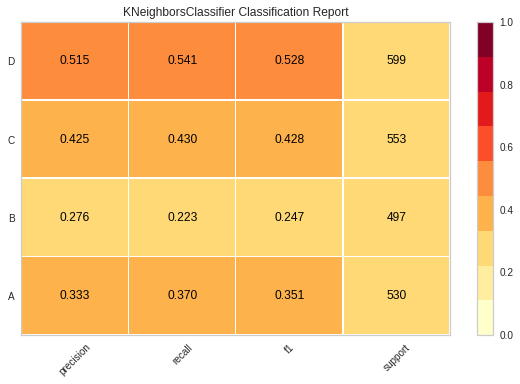

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'class_report')

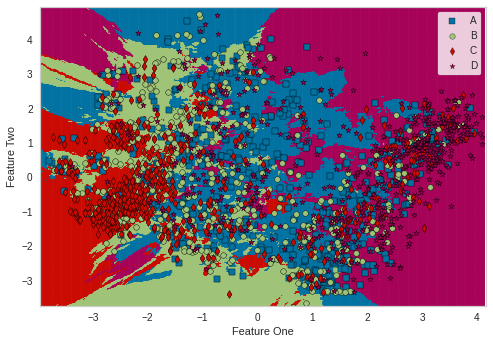

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot='boundary')

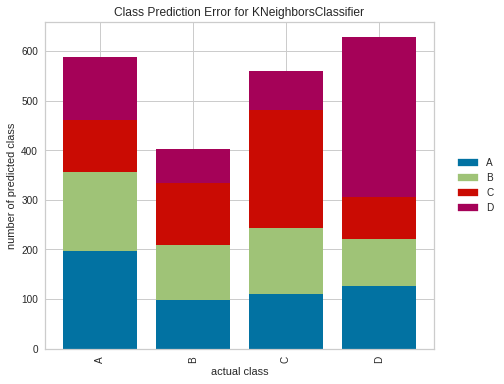

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'error')

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.3988,0.6594,0.3911,0.3935,0.3952,0.196,0.1963


In [ ]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom

In [ ]:
#Final K Nearest Neighbour parameters for deployment
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')


In [ ]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0.672,0,0,0,0,0


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Label,Score
0,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C,C,0.9412
1,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D,A,0.3529
2,464942,Male,No,19,No,Healthcare,4.0,Low,4.0,Cat_4,D,D,0.5294
3,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat_6,A,A,0.4118
4,466772,Male,Yes,58,Yes,Entertainment,1.0,Average,4.0,Cat_6,B,C,0.4118


In [ ]:
save_model(final_knn,'Final KNN Model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), model_name=Final KNN Model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Segmentation',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
   

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Segmentation',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('fix_perfect', Remove_100(target='Segmentation')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'pas

In [ ]:
saved_final_knn = load_model('Final KNN Model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KNN Model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Segmentation',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('fix_perfect', Remove_100(target='Segmentation')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('f

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0.672,0,0,0,0,0


In [ ]:
new_prediction.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Label,Score
0,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C,C,0.9412
1,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D,A,0.3529
2,464942,Male,No,19,No,Healthcare,4.0,Low,4.0,Cat_4,D,D,0.5294
3,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat_6,A,A,0.4118
4,466772,Male,Yes,58,Yes,Entertainment,1.0,Average,4.0,Cat_6,B,C,0.4118


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm
create_app(lightgbm)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as           ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0     459469    Male          Yes   30       Yes  Healthcare              NaN   
1     466886  Female           No   40        No   Marketing              1.0   
2     461747    Male          Yes   66       Yes      Artist              1.0   
3     465239    Male          Yes   56       Yes      Artist              0.0   
4     459531    Male           No   38       Yes   Marketing              3.0   
...      ...     ...          ...  ...       ...         ...              ...   
7256  466463  Female           No   29       Yes  Healthcare              2.0   
7257  464785    Male          Yes   35        No      Doctor              5.0   
7258  463403    Male           No   18        No  Healthcare              2.0   
7259  467467    Male           No   19

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://24688.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f65a28ed550>,
 'http://127.0.0.1:7861/',
 'https://24688.gradio.app')